In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [2]:
# Initialize Firebase Admin SDK and Firestore
cred = credentials.Certificate('./.streamlit/key.json')
firebase_admin.initialize_app(cred)
db = firestore.client()


In [11]:
# Get all documents in the "users" collection
queries = db.collection('queries')
docs = queries.stream()

# Initialize variables for analysis
total_queries = 0
query = []
number = []
time = []
language = []
# Analyze each document in the collection
for doc in docs:
    data = doc.to_dict()
    total_queries += 1
    query.append(data["query"])
    number.append(data["number"])
    time.append(data["timestamp"])
    try:    
        language.append(data["language"])
    except:
        language.append("English")
    # Check if user is active or inactive

    # Print analysis results
print('Total Queries:', total_queries)
    

Total Queries: 58


In [ ]:
# Q

In [4]:
all_queries = ". ".join(query)

In [5]:
query_count = {}
for word in query:
    if word in query_count:
        query_count[word] += 1
    else:
        query_count[word] = 1


{'': 2,
 'prayer': 2,
 'inheritance': 1,
 'أهمية الصلاة': 2,
 'Ramadan کی اہمیت': 2,
 'how much is the share of wife in inheritance ': 2,
 'نماز کی اہمیت': 12,
 'heirship': 1,
 'In how many days Allah created this universe': 1,
 'Important of parda': 1,
 'How to perform ghu': 1,
 'Surah Fatiha ': 2,
 'How to perform ghusl': 1,
 'how much is the share of wife when her husband is deceased?': 1,
 'when to fast?': 3,
 'Zakaat': 1,
 'fasting': 3,
 'سود': 4,
 'Importance of ': 1,
 'प्रार्थना का महत्व': 1,
 'who are the deserving of charity': 2,
 'Importance of Ramadan': 2,
 'Gratitude ': 1,
 'Hijab': 3,
 'Riba': 1,
 'חשיבות התפילה': 1,
 'eulogy': 1,
 'when should i marry': 1,
 'Interest ': 1,
 'نماز جي اهميت': 1}

/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/

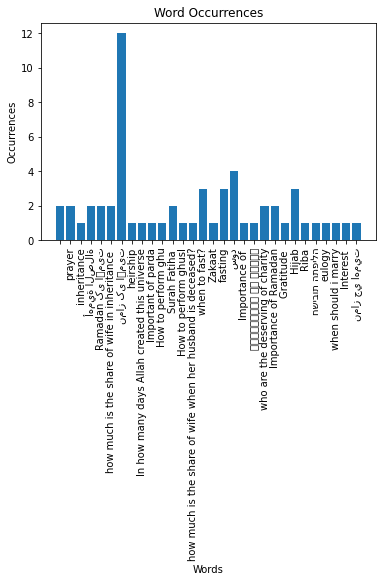

In [7]:
words = list(query_count.keys())
counts = list(query_count.values())

# Create a bar chart of the word occurrences
plt.bar(words, counts)

# Set the title and axis labels
plt.title("Word Occurrences")
plt.xlabel("Words")
plt.ylabel("Occurrences")

# Rotate the x-axis labels vertically for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


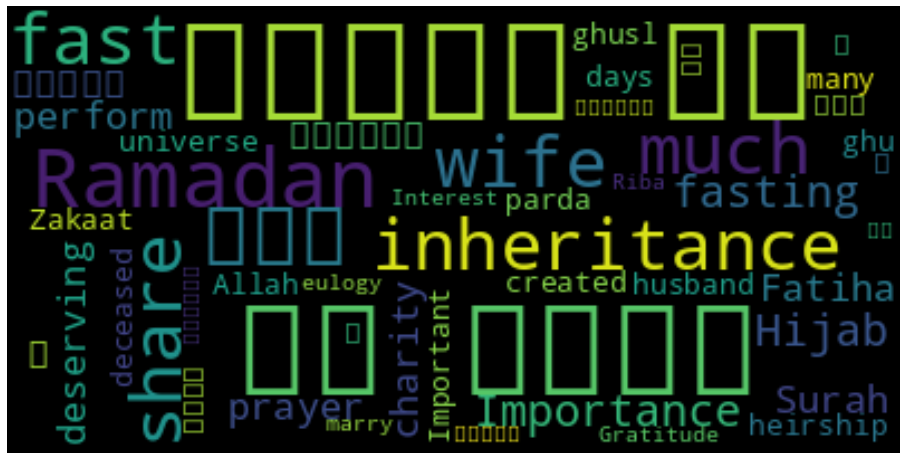

In [8]:
wordcloud = WordCloud(max_font_size=60).generate(all_queries)
plt.figure(figsize=(16,12))

# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()